### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filamentDomain = np.linspace(0,2*np.pi,1000)

# Circle Functions
C = lambda t : [np.cos(t), np.sin(t), t * 0]
dC = lambda t : [-np.sin(t), np.cos(t), t * 0]

# Ellipse Functions
E = lambda t: [ np.cos(t), 2 * np.sin(t), t*0 ]
dE = lambda t: [ -np.sin(t), 2 * np.cos(t), t*0 ]

# Pringle Function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
dP = lambda t: [ -np.sin(t), np.cos(t), 2*np.cos(t)*(-1)*np.sin(t) - 2*np.sin(t)*np.cos(t) ]

# Set which filament we are using
s = np.array( E(filamentDomain) )
ds = np.array( dE(filamentDomain) )

In [3]:
# Define the domain to calculate values on the x and y axis of the pringle
dom = np.linspace(-2.5,2.5,70)

# Find values on y = 0
xPosFunc = lambda t: [ t, t*0, t*0 ]
xPositions = np.array(xPosFunc( dom ))

# Find values on x = 0
yPosFunc = lambda t: [ t*0, t, t*0 ]
yPositions = np.array(yPosFunc( dom ))

# Regularization Options

## No Regularization

In [4]:
def BiotSavartNoRegularization( curve: np.array, curveTangent: np.array, fieldPoints: np.array ):
        pointFieldStrength = np.zeros( (len(curve[0,:]), len( fieldPoints[:,0] ), len( fieldPoints[0,:] ) ) )

        s = range( len(curve[0,:]) )

        for i in s:
            pointDistances =  fieldPoints - curve[:,i].reshape(-1,1)

            pointNorms = np.linalg.norm(pointDistances, axis=0)
            pointNormsCubed = np.power( pointNorms, 3)

            crossProduct = ( np.cross(curveTangent[:,i], pointDistances.T ) ).T
            pointFieldStrength[i,:,:] = crossProduct / pointNormsCubed

        v = np.trapz( pointFieldStrength, s , axis=0)
        return v

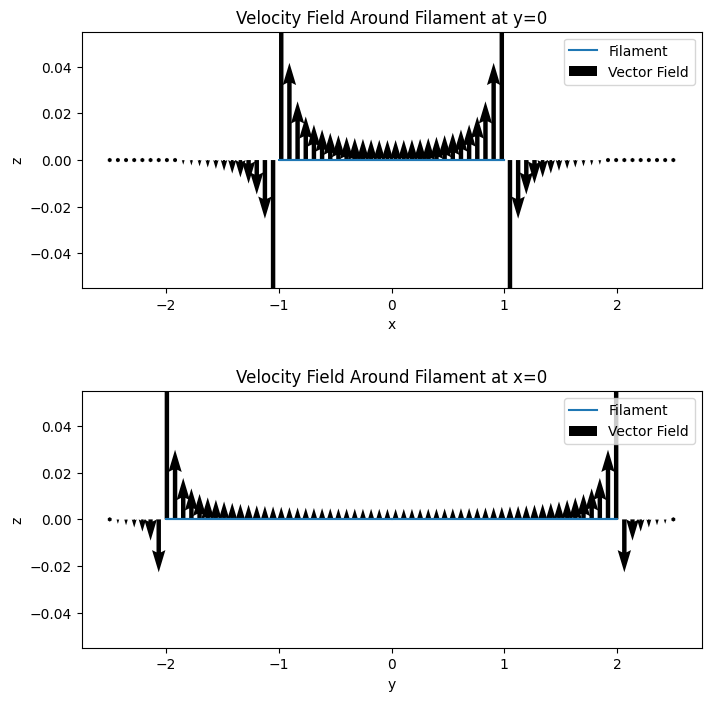

In [5]:
# Measure the VField at those points
bsPtsXAxis = BiotSavartNoRegularization( s, ds, xPositions )
bsPtsYAxis = BiotSavartNoRegularization( s, ds, yPositions )

# Get the plots ready
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# The y = 0 plot
axs[0].plot( s[0,:], s[2,:] )
axs[0].quiver( xPositions[0,:], xPositions[2,:], bsPtsXAxis[0,:], bsPtsXAxis[2,:] )
axs[0].set_title('Velocity Field Around Filament at y=0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].legend(['Filament','Vector Field'])

# The x = 0 plot
axs[1].plot( s[1,:], s[2,:] )
axs[1].quiver( yPositions[1,:], yPositions[2,:], bsPtsYAxis[1,:], bsPtsYAxis[2,:] )
axs[1].set_title('Velocity Field Around Filament at x=0')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].legend(['Filament','Vector Field'])

# Plot Styling
plt.subplots_adjust(hspace=0.4)

# Plot the vector values
plt.show()

## Constant Regularization

In [6]:
def BiotSavartConstRegularization( curve: np.array, curveTangent: np.array, fieldPoints: np.array, eps=10**-8 ):
        pointFieldStrength = np.zeros( (len(curve[0,:]), len( fieldPoints[:,0] ), len( fieldPoints[0,:] ) ) )

        s = range( len(curve[0,:]) )

        for i in s:
            pointDistances =  fieldPoints - curve[:,i].reshape(-1,1)

            pointNorms = np.linalg.norm(pointDistances, axis=0)
            pointNormsCubed = np.power( pointNorms, 3)

            crossProduct = ( np.cross(curveTangent[:,i], pointDistances.T ) ).T
            pointFieldStrength[i,:,:] = crossProduct / (pointNormsCubed + eps)

        v = np.trapz( pointFieldStrength, s , axis=0)
        return v

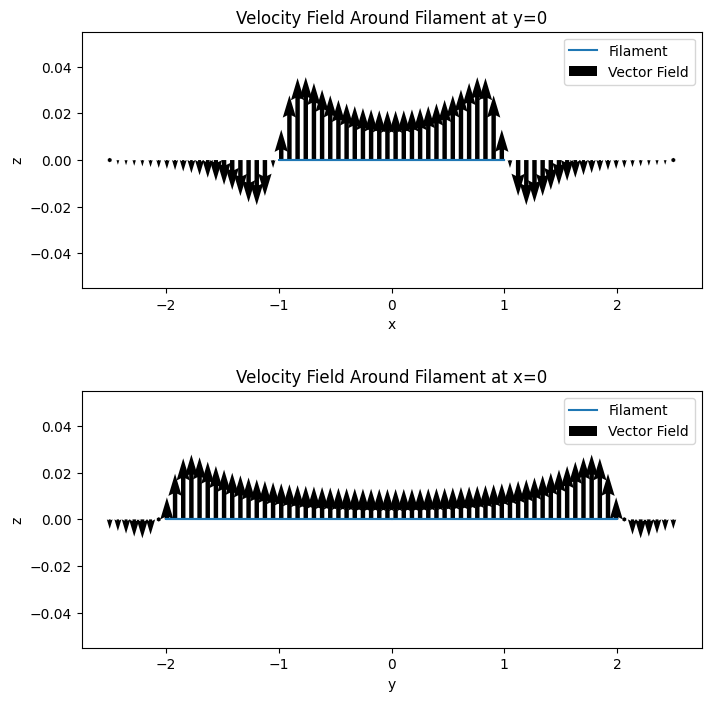

In [7]:
# Regularization Constant
eps = 1e-2

# Measure the VField at those points
bsPtsXAxis = BiotSavartConstRegularization( s, ds, xPositions, eps)
bsPtsYAxis = BiotSavartConstRegularization( s, ds, yPositions, eps)

# Get the plots ready
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# The y = 0 plot
axs[0].plot( s[0,:], s[2,:] )
axs[0].quiver( xPositions[0,:], xPositions[2,:], bsPtsXAxis[0,:], bsPtsXAxis[2,:] )
axs[0].set_title('Velocity Field Around Filament at y=0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].legend(['Filament','Vector Field'])

# The x = 0 plot
axs[1].plot( s[1,:], s[2,:] )
axs[1].quiver( yPositions[1,:], yPositions[2,:], bsPtsYAxis[1,:], bsPtsYAxis[2,:] )
axs[1].set_title('Velocity Field Around Filament at x=0')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].legend(['Filament','Vector Field'])

# Plot Styling
plt.subplots_adjust(hspace=0.4)

# Plot the vector values
plt.show()

## Vector Regularization Attempt One
This is a good template for how future vector regularizations should work

In [8]:
def BiotSavartVectorRegularization( curve: np.array, curveTangent: np.array, fieldPoints: np.array, eps: np.array ):
        pointFieldStrength = np.zeros( (len(curve[0,:]), len( fieldPoints[:,0] ), len( fieldPoints[0,:] ) ) )

        s = range( len(curve[0,:]) )

        for i in s:
            # The regularization part is here
            pointDistances =  (fieldPoints + eps.reshape(-1,1)) - curve[:,i].reshape(-1,1)

            pointNorms = np.linalg.norm(pointDistances, axis=0)
            pointNormsCubed = np.power( pointNorms, 3)

            crossProduct = ( np.cross(curveTangent[:,i], pointDistances.T ) ).T
            pointFieldStrength[i,:,:] = crossProduct / (pointNormsCubed)

        v = np.trapz( pointFieldStrength, s , axis=0)
        return v

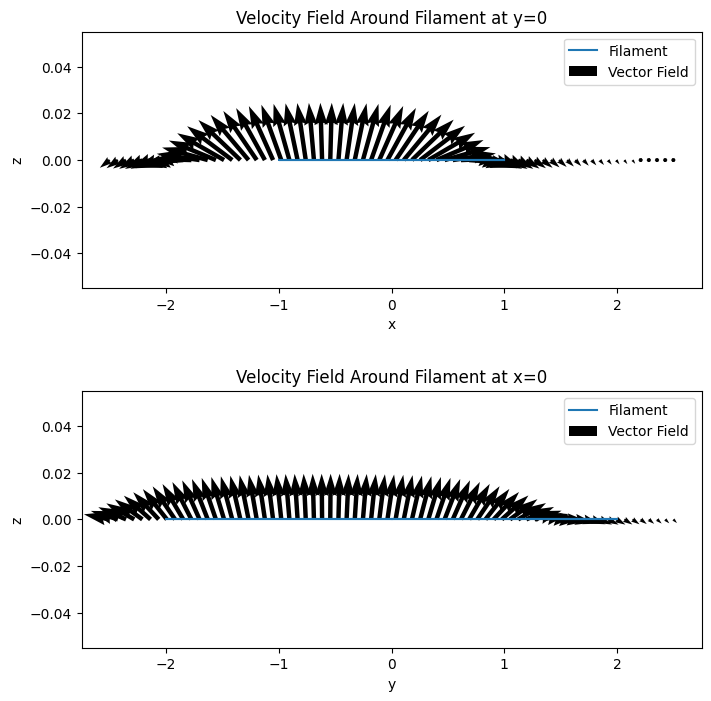

In [9]:
# Regularization Constant
eps = np.array( [1,1,1] ) / np.sqrt(3)

# Measure the VField at those points
bsPtsXAxis = BiotSavartVectorRegularization( s, ds, xPositions, eps)
bsPtsYAxis = BiotSavartVectorRegularization( s, ds, yPositions, eps)

# Get the plots ready
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# The y = 0 plot
axs[0].plot( s[0,:], s[2,:] )
axs[0].quiver( xPositions[0,:], xPositions[2,:], bsPtsXAxis[0,:], bsPtsXAxis[2,:] )
axs[0].set_title('Velocity Field Around Filament at y=0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].legend(['Filament','Vector Field'])

# The x = 0 plot
axs[1].plot( s[1,:], s[2,:] )
axs[1].quiver( yPositions[1,:], yPositions[2,:], bsPtsYAxis[1,:], bsPtsYAxis[2,:] )
axs[1].set_title('Velocity Field Around Filament at x=0')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].legend(['Filament','Vector Field'])

# Plot Styling
plt.subplots_adjust(hspace=0.4)

# Plot the vector values
plt.show()